# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [1]:
# Write Your information in here

student_name = 'Janne Arkko'
student_id = "AB3817"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [2]:
# TODO: preprocessing data
import pandas as pd

df = pd.read_csv('diabetes.csv')
#df.drop('Outcome', axis=1, inplace=True)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [3]:
# TODO: Split the dataset (80/20%).
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2025)
mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train))
X_test = pd.DataFrame(mms.transform(X_test))

Build a machine learning model with Decision Tree and test the model.

In [4]:
# TODO: Build and test the Model

classifier = DecisionTreeClassifier(random_state=2025)
classifier.fit(X_train, y_train)

y_pred_dt = classifier.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)

# TODO: Print accuracy of the model

print(f'Accuracy of Decision Tree: {round(acc_dt*100, 1)} %.')

Accuracy of Decision Tree: 72.7 %.


Let's 
* show the confusion matrix and
* print the importance of features.

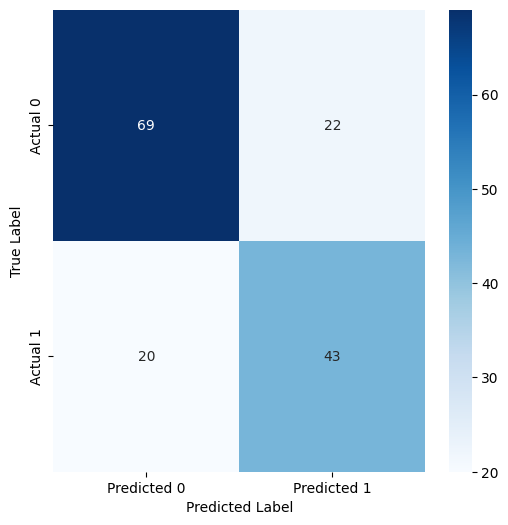

In [5]:
# TODO: the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show confusion matrix
plt.show()

In [6]:
# TODO: print the importance of features
feature_imp = classifier.feature_importances_ # get the importances
feature_df = pd.DataFrame({'Feature':X_train.columns, 'Importance': feature_imp}) # create a dataframe for them

feature_names = df.columns.tolist() # get the original df column names
feature_names.pop() # pop the 'Outcome' column
feature_df['Feature'] = feature_names # apply new names inplace of indexing numbers for easier recognition.
print("Feature Importances:")
print(feature_df)

Feature Importances:
                    Feature  Importance
0               Pregnancies    0.057638
1                   Glucose    0.312385
2             BloodPressure    0.076338
3             SkinThickness    0.034084
4                   Insulin    0.071768
5                       BMI    0.179812
6  DiabetesPedigreeFunction    0.100937
7                       Age    0.167038


Try to do some suitable visualization of the data.

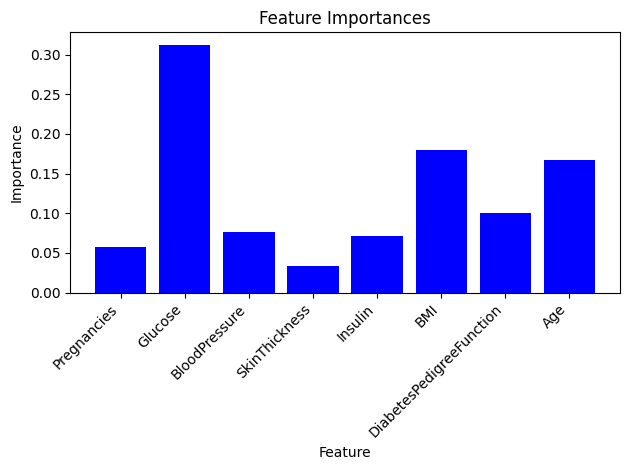

In [7]:
# TODO: Visualization
plt.bar(feature_df['Feature'], feature_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [8]:
# TODO: Split the dataset (80/20%).

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2025)
mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train))
X_test = pd.DataFrame(mms.transform(X_test))

# TODO: Build and test the Model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_gnb)
cm = confusion_matrix(y_test, y_pred_gnb)

# TODO: Print accuracy of the model

print(f'Accuracy of Naive Bayes: {round(acc_gnb*100, 1)} %.')

Accuracy of Naive Bayes: 74.0 %.


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

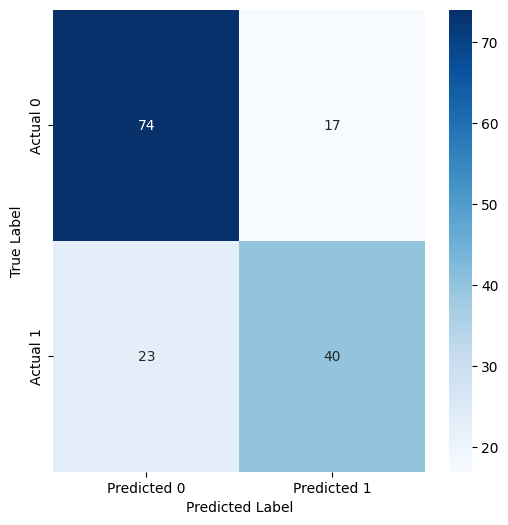

In [9]:
# TODO: the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# print confusion matrix
plt.show()

## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [10]:
# TODO: Split the dataset (80/20%).

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2025)
mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train))
X_test = pd.DataFrame(mms.transform(X_test))

# TODO: Build and test the Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

# TODO: Print accuracy of the model

print(f'Accuracy of kNN: {round(acc_knn*100, 1)} %.')

Accuracy of kNN: 68.2 %.


Processing of results (kNN method) and show confusion matrix.

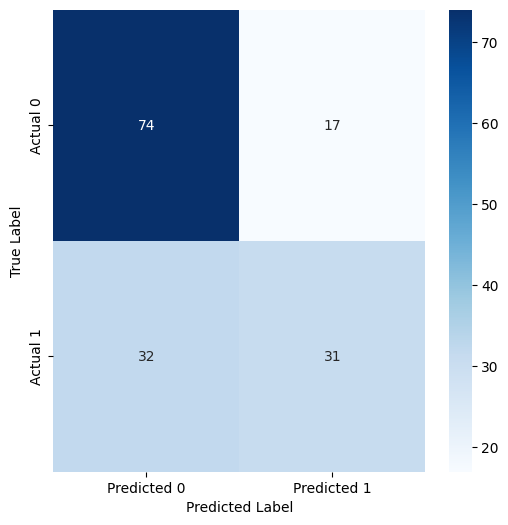

In [11]:
# TODO: show confusion matrix
cm2 = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,6))
sns.heatmap(cm2,annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# print confusion matrix
plt.show()

## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

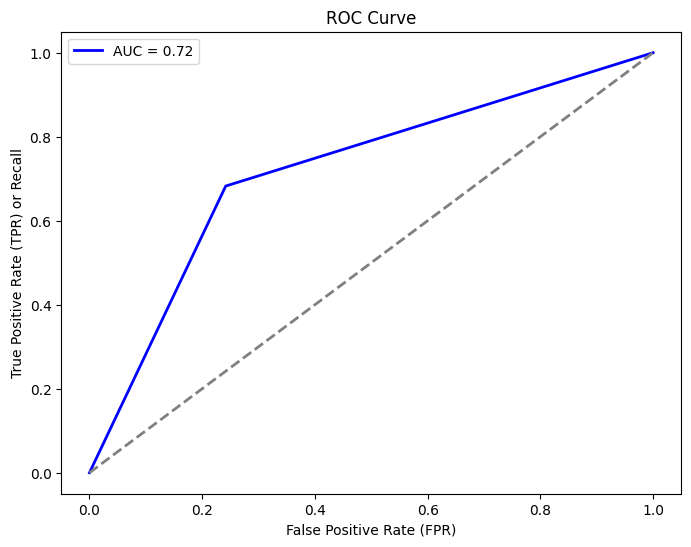

In [12]:
# TODO: ROC for decision tree

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

roc_auc = roc_auc_score(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.legend()
plt.show()

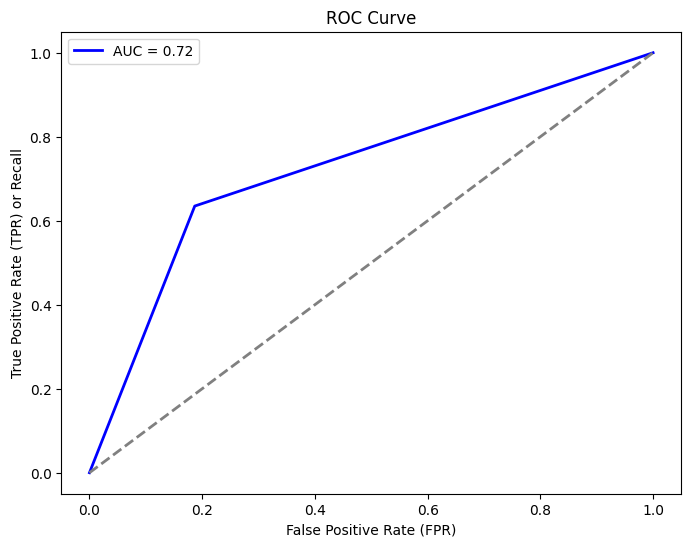

In [13]:
# TODO: ROC for Naive Gaussian
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)

roc_auc = roc_auc_score(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.legend()
plt.show()

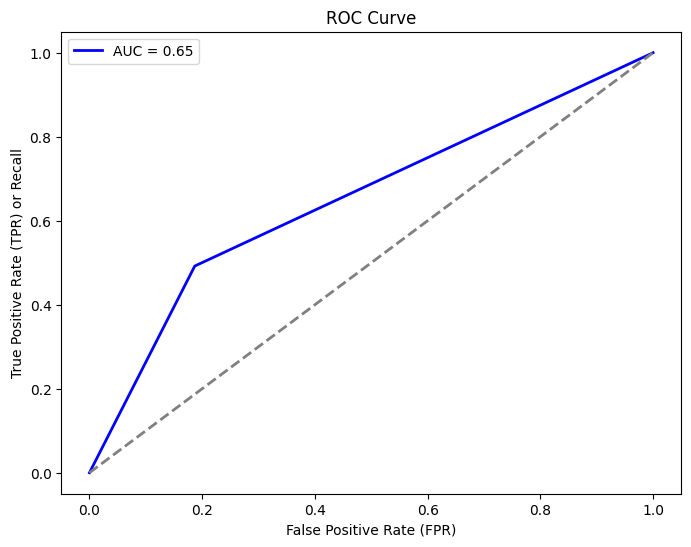

In [14]:
# TODO: ROC for kNN
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

roc_auc = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Conclusion
* TODO: Write comparison and conclusion of the results you got.

* **PLEASE WRITE YOUR ANSWER HERE!**

The results were quite similar all together. I found that DecisionTree and Naive Gaussian produced the highest accuracies, 74% for the Naive Gaussian and 72% for DecisionTree, respectfully, while the kNN was at roughly 68% being the worst of the three.

I think that these probabilities are not good as even 74% accuracy is still quite inaccurate as over 25% of the predictions are false.

I was left to think that would we be allowed to clean up the data even more like remove rows with alot of zeros as I think that that would make a difference.

It's fun and educational to see how the different features affect the outcomes. Like the blood glucose levels which, according to the data, affects almost twice as much to getting diabetes or not. And you wouldn't see it without plotting the features like that and then it was all clear as the bar in the chart rose so high.

But anyway, my conclusion is that all these methods are usable. They are used in a very similar manner and produce little variance in the results, which I think would be drastically improved with even better data.

I didn't know that does it affect the assessment of the exercises if I tried to clean the data for better results and play around with the algorithms. Didn't do it now, but I probably will later on.

## Extra Assignment: Other ML Methods

Can you find any other suitable ML classification methods which is better that these three with this dataset?
Of course, it needs some implementation to try out your solution and comparison of the results.

#### Why? 

Why to do this extra assignments if you cannot get any extra points? 

*Some ML models are taught in the course, but the most important thing is to create a basis for competence in the course and to find new, better solutions if necessary.
In particular, data analytics and artificial intelligence are developing rapidly, so applying the new methods is important.* 

In [15]:
# SVM algorithm tryout

from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)
y_pred_svm = svm_classifier.fit(X_train, y_train).predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)

# comparing the different algorithms
print(f'Accuracy of SVM: {round(acc_svm*100, 1)} %.')
print(f'Accuracy of kNN: {round(acc_knn*100, 1)} %.')
print(f'Accuracy of Naive Bayes: {round(acc_gnb*100, 1)} %.')
print(f'Accuracy of Decision Tree: {round(acc_dt*100, 1)} %.')


Accuracy of SVM: 74.7 %.
Accuracy of kNN: 68.2 %.
Accuracy of Naive Bayes: 74.0 %.
Accuracy of Decision Tree: 72.7 %.


Well we got a little bit better result with the Support Vector Machine algorithm. Best so far.